IMPORTING NECESSARY LIBRARIES TO USE

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

READING THE CSV FILE USING PANDAS AND ASSIGNING IT TO data VARIABLE

In [2]:
path = 'fosterCasesNatl2000_2020.csv'
data = pd.read_csv(path)

C:\Users\NISA\anaconda3\envs\gpu\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


VISUALIZING THE FIRST 10 ROWS OF THE DATASET

In [4]:
data.head(10)

,Unnamed: 0,DATAYEAR,VERSION,STATE,ST,REPDATYR,REPDATMO,FIPSCODE,RECNUMBR,SEX,...,ISWAITING,ISTPR,AGEDOUT,RACEETHN,FY,RACE,STFCID,PERIODSTART,PERIODEND,TARGET
0,236957,2007.0,5.0,48.0,TX,2007.0,9.0,8.0,\x,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,574271,2007.0,5.0,18.0,IN,2007.0,9.0,18089.0,\x,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,40607,2007.0,5.0,36.0,NY,2007.0,9.0,36061.0,25,1.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,335231,2007.0,5.0,6.0,CA,2007.0,9.0,6037.0,00,1.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,654129,2007.0,5.0,26.0,MI,2007.0,9.0,26163.0,00,2.0,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,621155,2007.0,5.0,22.0,LA,2007.0,9.0,8.0,XX,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,448854,2007.0,5.0,9.0,CT,2007.0,9.0,9001.0,C=,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,782493,2007.0,5.0,72.0,PR,2007.0,9.0,8.0,\x,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,569376,2007.0,5.0,18.0,IN,2007.0,9.0,8.0,\x,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9,344786,2007.0,5.0,6.0,CA,2007.0,9.0,6037.0,00,2.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


GETTING COLUMN NUMBERS

In [5]:
columns = data.columns
num=0
for i in columns:
    num+=1
    print('column %d %s'%(num,i))

column 1 Unnamed: 0
column 2 DATAYEAR
column 3 VERSION
column 4 STATE
column 5 ST
column 6 REPDATYR
column 7 REPDATMO
column 8 FIPSCODE
column 9 RECNUMBR
column 10 SEX
column 11 AMIAKN
column 12 ASIAN
column 13 BLKAFRAM
column 14 HAWAIIPI
column 15 WHITE
column 16 UNTODETM
column 17 HISORGIN
column 18 TOTALREM
column 19 NUMPLEP
column 20 PHYABUSE
column 21 SEXABUSE
column 22 NEGLECT
column 23 AAPARENT
column 24 DAPARENT
column 25 AACHILD
column 26 DACHILD
column 27 CHILDIS
column 28 CHBEHPRB
column 29 PRTSDIED
column 30 PRTSJAIL
column 31 NOCOPE
column 32 ABANDMNT
column 33 RELINQSH
column 34 HOUSING
column 35 CURPLSET
column 36 PLACEOUT
column 37 CASEGOAL
column 38 DISREASN
column 39 IVEFC
column 40 IVEAA
column 41 IVAAFDC
column 42 IVDCHSUP
column 43 XIXMEDCD
column 44 SSIOTHER
column 45 NOA
column 46 FCMNTPAY
column 47 DOB
column 48 REM1DT
column 49 LATREMDT
column 50 CURSETDT
column 51 REMTRNDT
column 52 LATREMLOS
column 53 SETTINGLOS
column 54 AGEATSTART
column 55 AGEATLATREM
colu

CLEANING DATA

The sum of missing values

In [6]:
print('Sum of errored or empty cells: %d'%data.isna().sum().sum())
print('Sum of filled values: %d'%data.count().sum().sum())

Sum of errored or empty cells: 6827035
Sum of filled values: 100461278


VISUALIZING FILLED CELLS AND EMPTY  CELLS

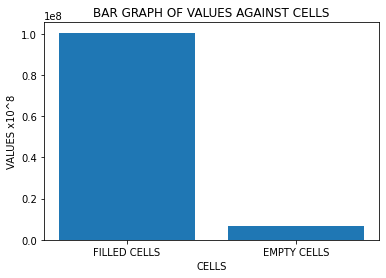

In [7]:
LABELS = ['FILLED CELLS','EMPTY CELLS']
VALUES = [data.count().sum(),data.isna().sum().sum()]
plt.bar(LABELS,VALUES)
plt.title('BAR GRAPH OF VALUES AGAINST CELLS')
plt.xlabel('CELLS')
plt.ylabel('VALUES x10^8')
plt.show()

FILLING EMPTY CELLS WITH ZERO (AN ASSUMPTION)

In [8]:
data = data.fillna(0)
print('Empty cells %s'%data.isna().sum().sum())

Empty cells 0


In [9]:
data.to_csv('Risk_.csv')

GETTING YEARS TO VISUALIZE

In [10]:
years=data['DATAYEAR'].unique()[0:]
print(years)

[2007. 2006. 2005. 2004. 2003. 2001. 2000.    0.]


GRAPH OF PHYSICAL AND SEXUAL ABUSE OVER YEARS

In [ ]:
values = []
for year in years:
  num_phy = 0
  num_sex = 0
  val = data.loc[data['DATAYEAR']==year]
  for i in range(len(val['PHYABUSE'])):
    num_phy+=val.iloc[i,19]

  for i in range(len(val['SEXABUSE'])):
    num_sex+=val.iloc[i,20]
  values.append([num_phy,num_sex])

print(values)

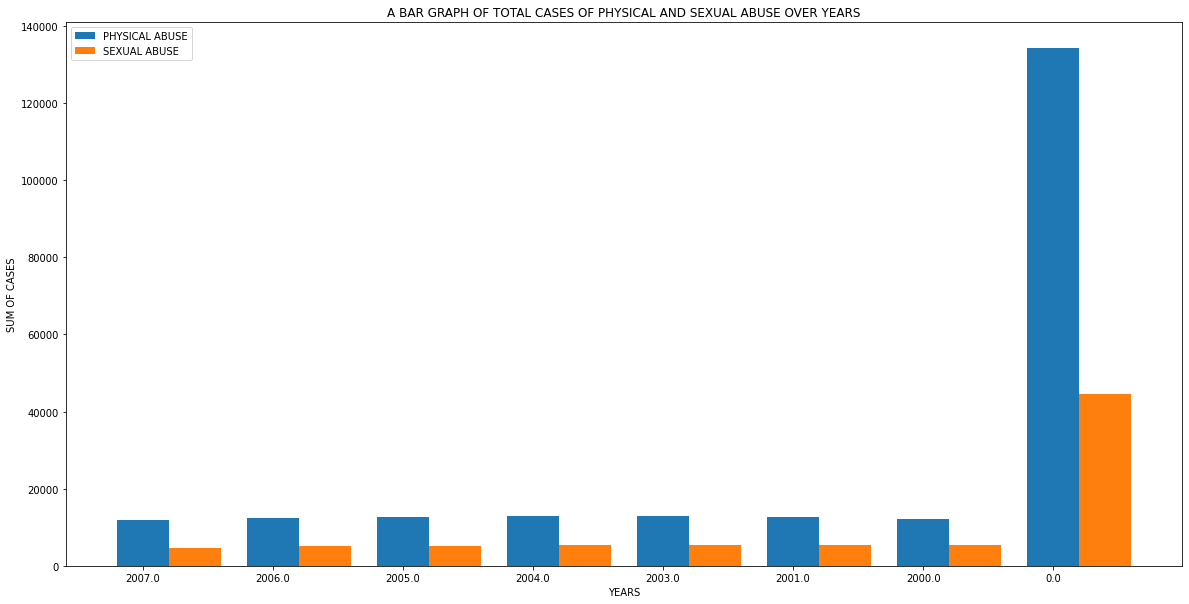

In [ ]:
x = np.arange(8)
plt.figure(figsize=[20,10])
plt.bar(x,[values[i][0] for i in range(len(values))],width=0.4)
plt.bar(x+0.4,[values[i][1] for i in range(len(values))],width=0.4)
plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
plt.xlabel('YEARS')
plt.ylabel('SUM OF CASES')
plt.title('A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE OVER YEARS')
plt.xticks(x,years)
plt.show()

WITH THE ABOVE GRAPH THE LAST COHORT IS BIASED IT IS BETTER WE DO AWAY WITH IT

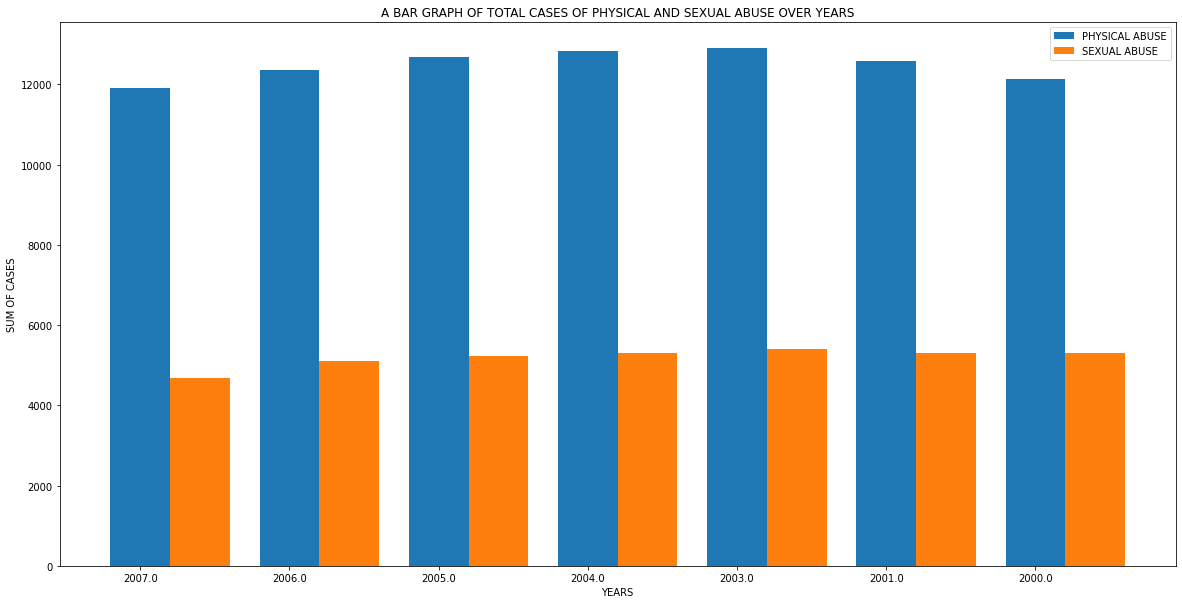

In [ ]:
x = np.arange(7)
plt.figure(figsize=[20,10])
plt.bar(x,[values[i][0] for i in range(len(values[:-1]))],width=0.4)
plt.bar(x+0.4,[values[i][1] for i in range(len(values[:-1]))],width=0.4)
plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
plt.xlabel('YEARS')
plt.ylabel('SUM OF CASES')
plt.title('A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE OVER YEARS')
plt.xticks(x,years[:-1])
plt.show()

A GRAPH OF PHY AND SEX ABUSE AGAINST RACES

In [ ]:
#data['RACE'].unique()
RACES = data['RACE'].unique()
values = []
for race in RACES:
  num_phy = 0
  num_sex = 0
  val = data.loc[data['RACE']==race]
  for i in range(len(val['PHYABUSE'])):
    num_phy+=val.iloc[i,19]

  for i in range(len(val['SEXABUSE'])):
    num_sex+=val.iloc[i,20]
  values.append([num_phy,num_sex])

print(values)

[[87422.0, 36337.0], [39616.0, 9190.0], [10130.0, 2579.0], [72257.0, 28540.0], [8122.0, 2896.0], [2413.0, 821.0], [1159.0, 447.0], [514.0, 162.0]]


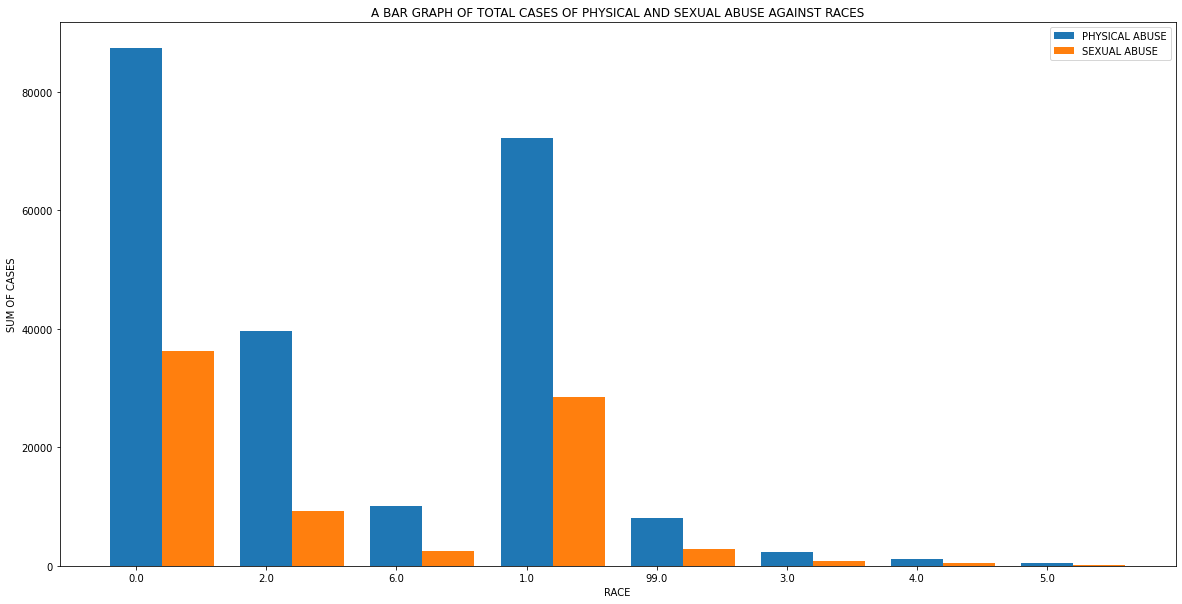

In [ ]:
x = np.arange(len(data['RACE'].unique()))
plt.figure(figsize=[20,10])
plt.bar(x,[values[i][0] for i in range(len(values))],width=0.4)
plt.bar(x+0.4,[values[i][1] for i in range(len(values))],width=0.4)
plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
plt.xlabel('RACE')
plt.ylabel('SUM OF CASES')
plt.title('A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE AGAINST RACES')
plt.xticks(x,RACES)
plt.show()

GRAPH OF ABUSE CASES AGAINST GENDER

In [ ]:
GENDER = data['SEX'].unique()
values = []
for gender in GENDER:
  num_phy = 0
  num_sex = 0
  val = data.loc[data['SEX']==gender]
  for i in range(len(val['PHYABUSE'])):
    num_phy+=val.iloc[i,19]

  for i in range(len(val['SEXABUSE'])):
    num_sex+=val.iloc[i,20]
  values.append([num_phy,num_sex])

print(values)

[[107414.0, 52518.0], [114177.0, 28442.0], [42.0, 12.0]]


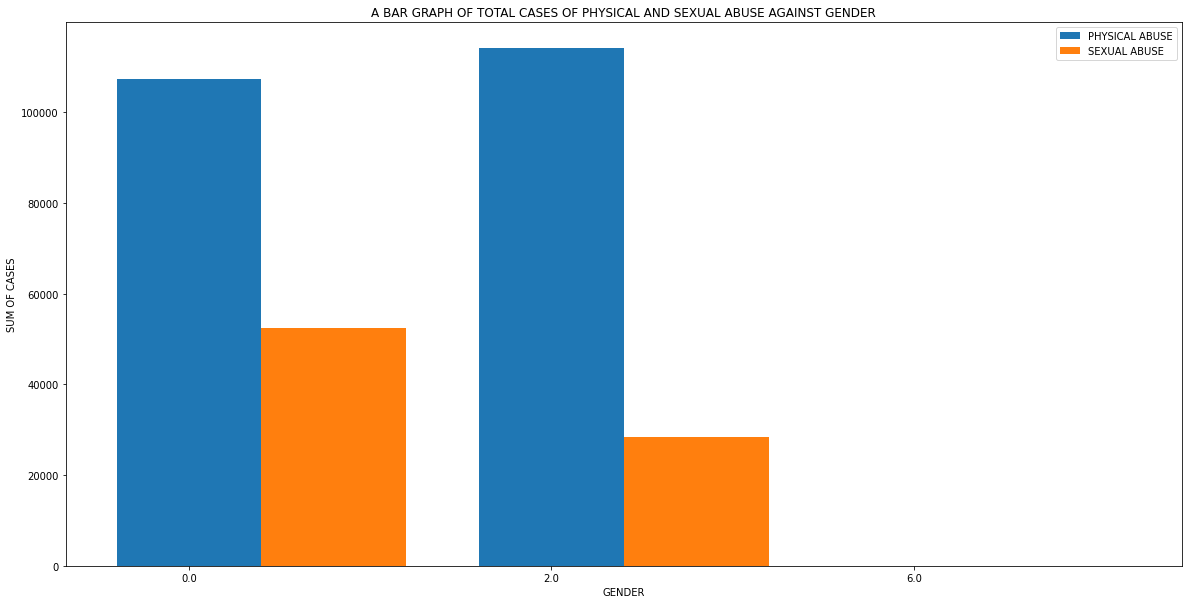

In [ ]:
x = np.arange(len(data['SEX'].unique()))
plt.figure(figsize=[20,10])
plt.bar(x,[values[i][0] for i in range(len(values))],width=0.4)
plt.bar(x+0.4,[values[i][1] for i in range(len(values))],width=0.4)
plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
plt.xlabel('GENDER')
plt.ylabel('SUM OF CASES')
plt.title('A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE AGAINST GENDER')
plt.xticks(x,RACES)
plt.show()

Number of Abuse Case and Total Number of Removals based on STATES

In [ ]:
STATE = data['ST'].unique()
values = []
for st in STATE:
  num_phy = 0
  num_sex = 0
  val = data.loc[data['ST']==st]
  for i in range(len(val['PHYABUSE'])):
    num_phy+=val.iloc[i,19]

  for i in range(len(val['SEXABUSE'])):
    num_sex+=val.iloc[i,20]
  values.append([num_phy,num_sex])

print(values)

[[31994.0, 10219.0], [4486.0, 1866.0], [1943.0, 777.0], [23493.0, 8330.0], [8320.0, 2831.0], [1698.0, 852.0], [1674.0, 612.0], [2793.0, 871.0], [2177.0, 763.0], [3163.0, 1121.0], [2203.0, 1163.0], [2966.0, 696.0], [673.0, 235.0], [6521.0, 3013.0], [2169.0, 1275.0], [5719.0, 1881.0], [14421.0, 4408.0], [7409.0, 1980.0], [2805.0, 1119.0], [3453.0, 1269.0], [2675.0, 800.0], [326.0, 111.0], [2700.0, 1620.0], [6223.0, 2649.0], [6872.0, 3613.0], [3080.0, 922.0], [926.0, 245.0], [7897.0, 6786.0], [5315.0, 1613.0], [1427.0, 608.0], [1493.0, 778.0], [3845.0, 1257.0], [1641.0, 818.0], [1840.0, 915.0], [3345.0, 1329.0], [380.0, 130.0], [1867.0, 556.0], [840.0, 141.0], [1701.0, 617.0], [2091.0, 1109.0], [2718.0, 987.0], [12016.0, 2373.0], [689.0, 348.0], [2968.0, 1390.0], [8888.0, 899.0], [3606.0, 1600.0], [1496.0, 419.0], [938.0, 262.0], [448.0, 181.0], [776.0, 412.0], [226.0, 55.0], [300.0, 148.0]]


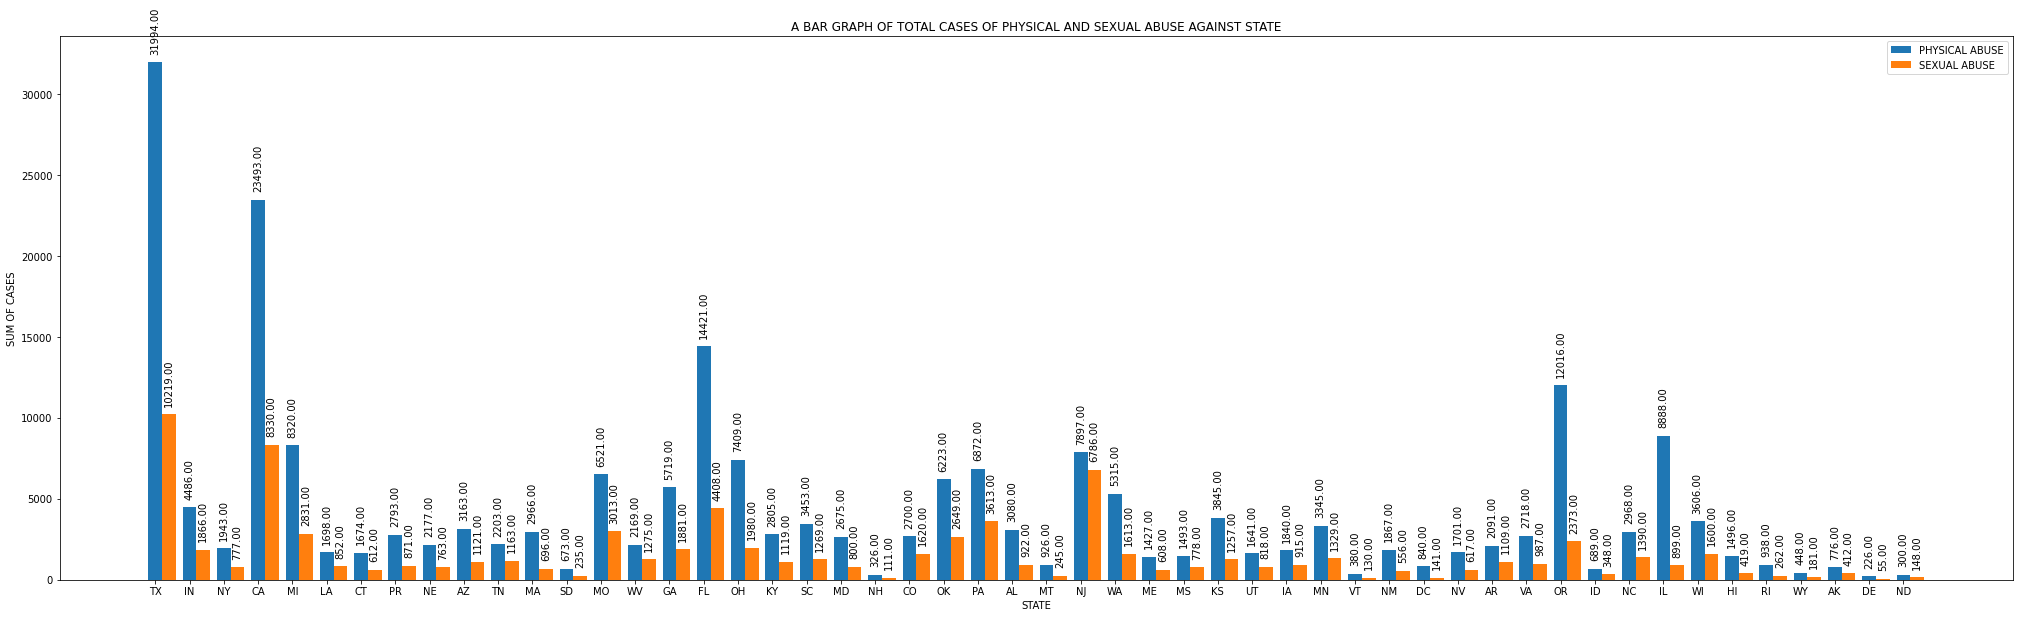

In [ ]:
xs = np.arange(len(data['ST'].unique()))
plt.figure(figsize=[35,10])
plt.bar(xs,[values[i][0] for i in range(len(values))],width=0.4)
# zip joins x and y coordinates in pairs
for x,y in zip(xs,[values[i][0] for i in range(len(values))]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',rotation=90)
plt.bar(xs+0.4,[values[i][1] for i in range(len(values))],width=0.4)
for x,y in zip(xs+0.4,[values[i][1] for i in range(len(values))]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',rotation=90)
plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
plt.xlabel('STATE')
plt.ylabel('SUM OF CASES')
plt.title('A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE AGAINST STATE')
plt.xticks(xs,STATE)
plt.show()

ANALYSIS BASED ON ORIGIN

[[213957.0, 78399.0], [7676.0, 2573.0]]


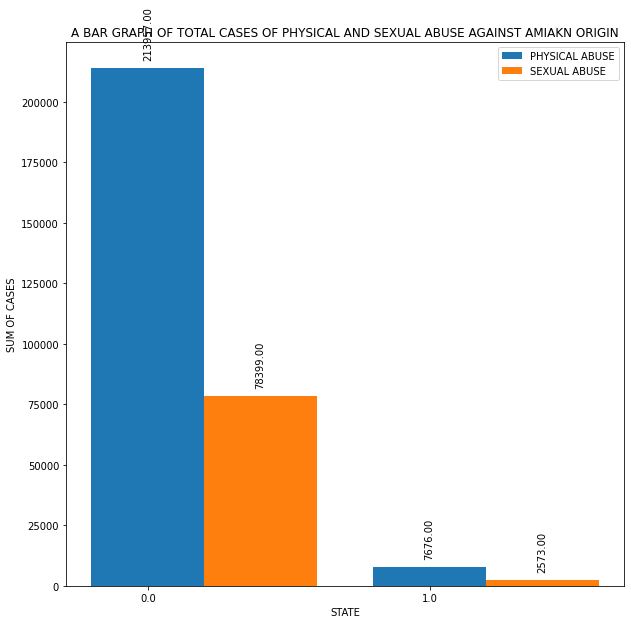

[[218036.0, 79748.0], [3597.0, 1224.0]]


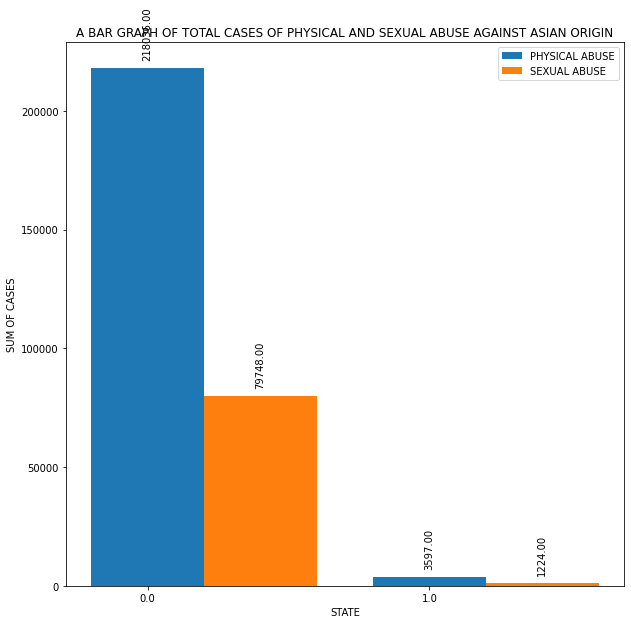

[[143831.0, 59767.0], [77802.0, 21205.0]]


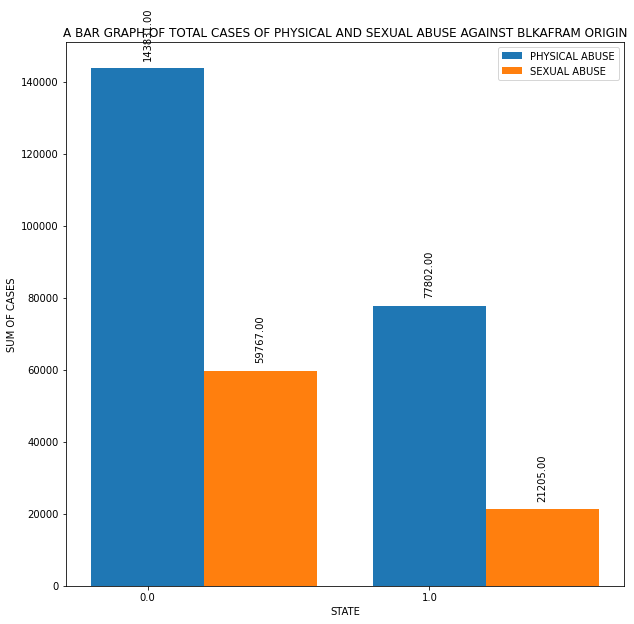

[[219731.0, 80435.0], [1902.0, 537.0]]


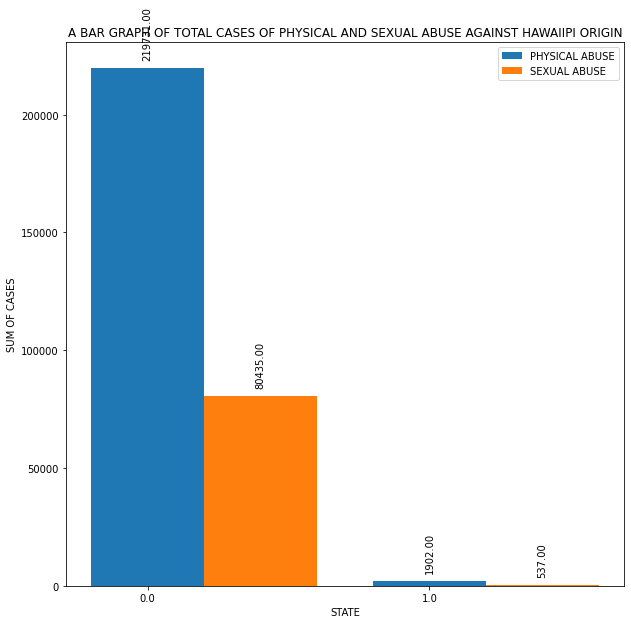

[[129497.0, 53269.0], [92136.0, 27703.0]]


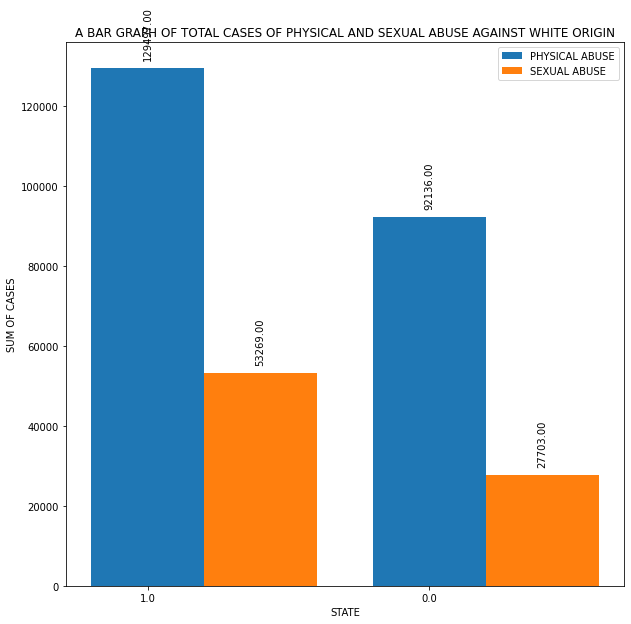

[[209019.0, 76062.0], [12614.0, 4910.0]]


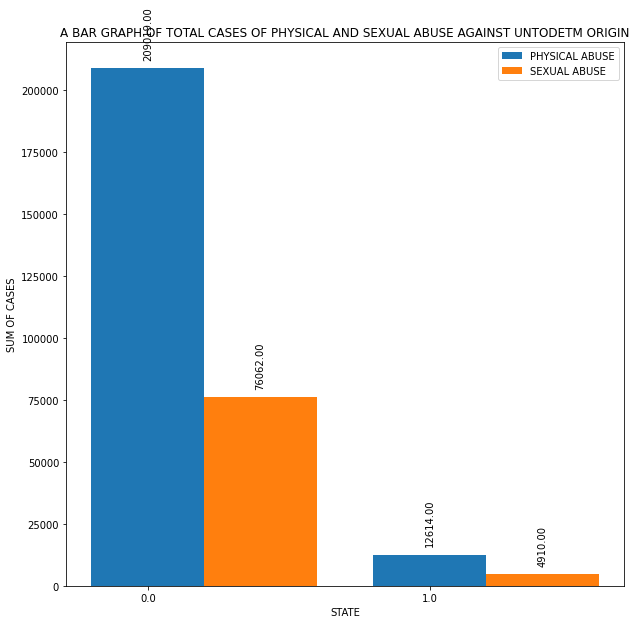

[[45504.0, 17178.0], [158618.0, 58378.0], [15746.0, 4990.0], [1765.0, 426.0]]


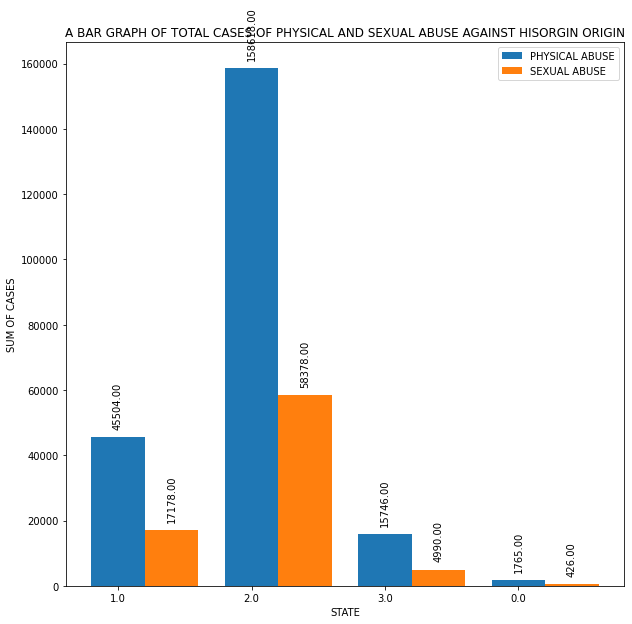

In [ ]:
target_columns = data.columns[[i for i in range(10, 17,1)]]
for col in target_columns:
  target_data = data[col].unique()
  values = []
  for st in target_data:
    num_phy = 0
    num_sex = 0
    val = data.loc[data[col]==st]
    for i in range(len(val['PHYABUSE'])):
      num_phy+=val.iloc[i,19]

    for i in range(len(val['SEXABUSE'])):
      num_sex+=val.iloc[i,20]
    values.append([num_phy,num_sex])

  print(values)
  #GRAPHICAL PART
  xs = np.arange(len(data[col].unique()))
  plt.figure(figsize=[10,10])
  plt.bar(xs,[values[i][0] for i in range(len(values))],width=0.4)
  # zip joins x and y coordinates in pairs
  for x,y in zip(xs,[values[i][0] for i in range(len(values))]):

      label = "{:.2f}".format(y)

      plt.annotate(label, # this is the text
                  (x,y), # these are the coordinates to position the label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center',rotation=90)
  plt.bar(xs+0.4,[values[i][1] for i in range(len(values))],width=0.4)
  for x,y in zip(xs+0.4,[values[i][1] for i in range(len(values))]):

      label = "{:.2f}".format(y)

      plt.annotate(label, # this is the text
                  (x,y), # these are the coordinates to position the label
                  textcoords="offset points", # how to position the text
                  xytext=(0,10), # distance from text to points (x,y)
                  ha='center',rotation=90)
  plt.legend(['PHYSICAL ABUSE','SEXUAL ABUSE'])
  plt.xlabel('STATE')
  plt.ylabel('SUM OF CASES')
  plt.title(f'A BAR GRAPH OF TOTAL CASES OF PHYSICAL AND SEXUAL ABUSE AGAINST {col} ORIGIN')
  plt.xticks(xs,target_data)
  plt.show()

SEPARATING TARGET VARIABLES

In [ ]:
X,y = data.drop(data.columns[[19,20]],axis=1),data.iloc[:,[19,20]]
X = X.drop(['ST', 'RECNUMBR', 'STFCID'],axis=1)
print(X.shape)
print(y.shape)

(1511103, 66)
(1511103, 2)


ASSIGNING dmatrix using label and data

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y.iloc[:,0])

SPLITTING DATA INTO TRAIN AND TEST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,0], test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.318966


Fitting and training the model

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


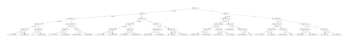

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [5000, 100]
plt.show()

FEATURE IMPORTANCE GRAPH

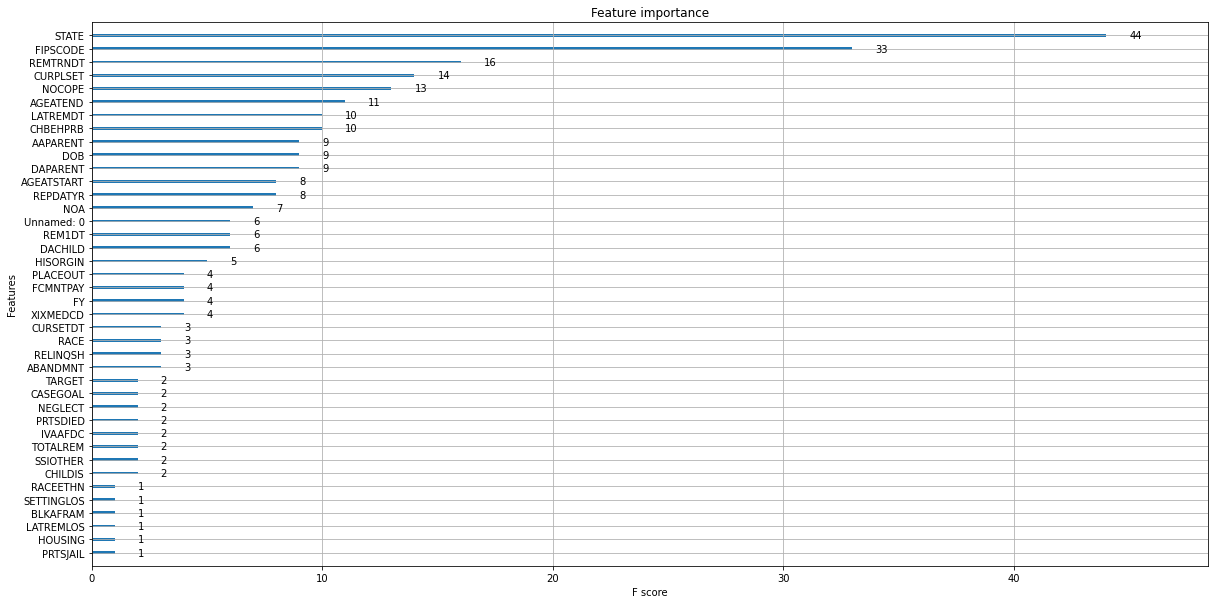

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

TRAINING FOR SEX ABUSE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,1], test_size=0.2, random_state=123)

SEX ABUSE xgboost MODEL

In [ ]:
sg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
sg_reg.fit(X_train,y_train)

preds = sg_reg.predict(X_test)

[01:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.259561


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
sg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[01:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


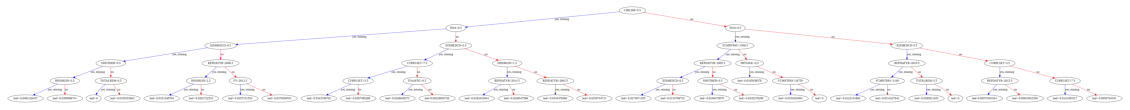

In [ ]:
xgb.plot_tree(sg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [ ]:
xgb.plot_importance(sg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()